# Exploratory data analysis on a public dataset from kaggle - Student Performance Factors
### A HexSoftware internship project by Sarvamm

In [235]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [237]:
data = pd.read_csv("C:/Users/Sarvamm/Documents/Codes/Jupyter/Datasets/StudentPerformanceFactors.csv")

In [238]:
data.shape


(6607, 20)

In [241]:
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [242]:
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [244]:
data.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [247]:
data.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [248]:
#Dropping redundant and incomplete data
ndata = data.drop(["Teacher_Quality", "Parental_Education_Level", "Distance_from_Home", "School_Type","Previous_Scores"], axis=1)

In [251]:
ndata.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions',
       'Family_Income', 'Peer_Influence', 'Physical_Activity',
       'Learning_Disabilities', 'Gender', 'Exam_Score'],
      dtype='object')

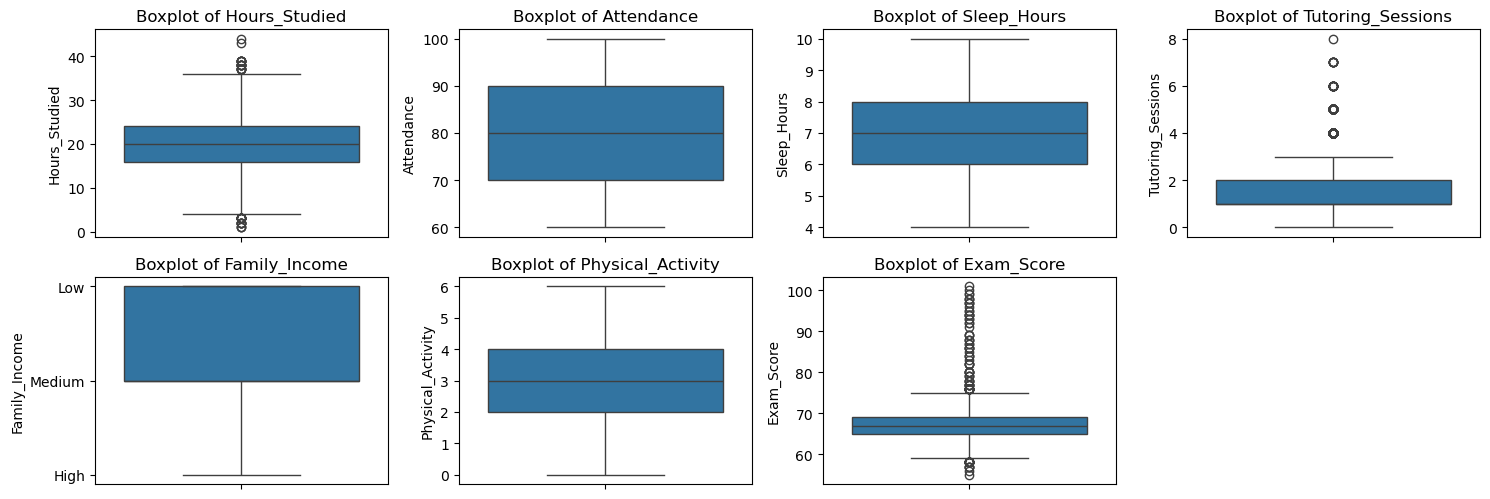

In [253]:
# Plotting boxplots for numerical features to detect outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=ndata[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


### Few data points exhibit characteristics of natural outliers.

In [255]:
ndata.nunique()


Hours_Studied                 41
Attendance                    41
Parental_Involvement           3
Access_to_Resources            3
Extracurricular_Activities     2
Sleep_Hours                    7
Motivation_Level               3
Internet_Access                2
Tutoring_Sessions              9
Family_Income                  3
Peer_Influence                 3
Physical_Activity              7
Learning_Disabilities          2
Gender                         2
Exam_Score                    45
dtype: int64

---

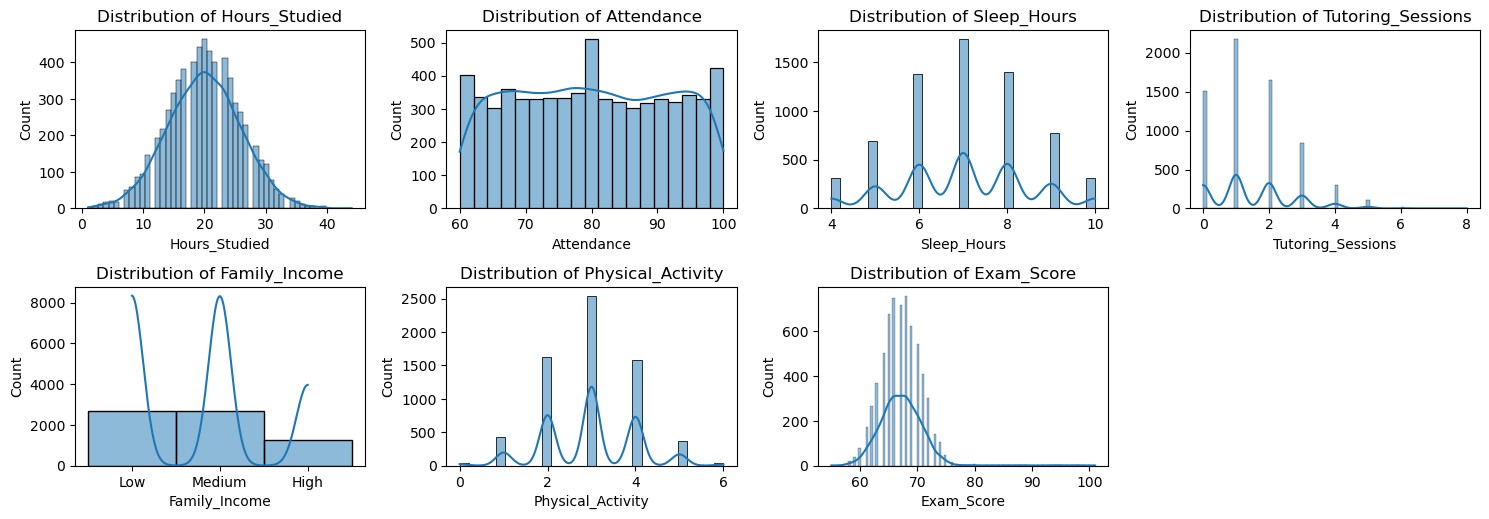

In [257]:
# Plot distributions of numerical features
num_cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Tutoring_Sessions',
            'Family_Income', 'Physical_Activity', 'Exam_Score']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(ndata[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


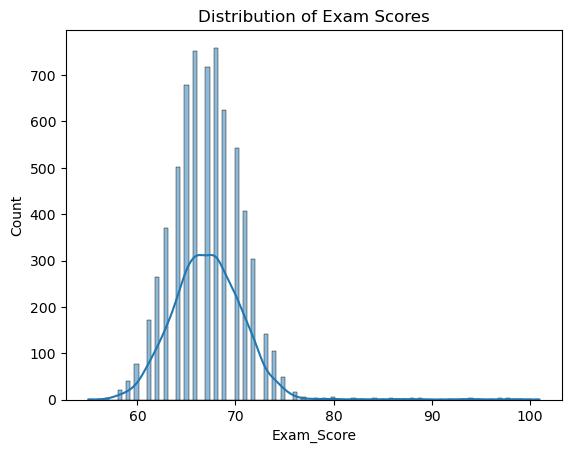

In [258]:
#Closer look at the exam score distribution
sns.histplot(ndata['Exam_Score'], kde=True)
plt.title('Distribution of Exam Scores')
plt.show()

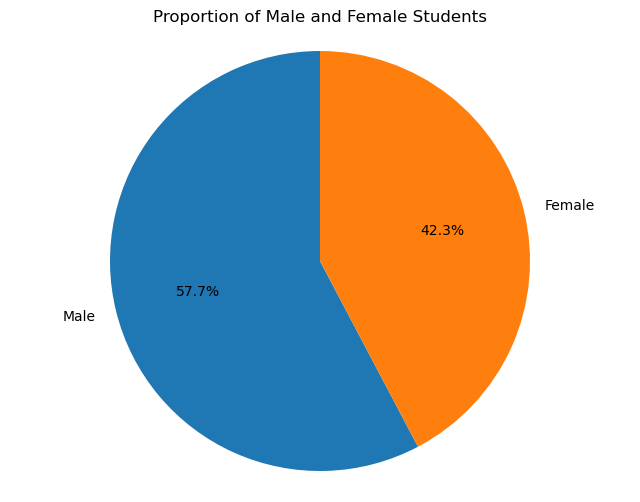

Male count: 3814
Female count: 2793


In [259]:
# Count the number of male and female students
gender_counts = ndata['Gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Male and Female Students')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

# Print counts
male_count = gender_counts.get('Male', 0)
female_count = gender_counts.get('Female', 0)
print("Male count:", male_count)
print("Female count:", female_count)


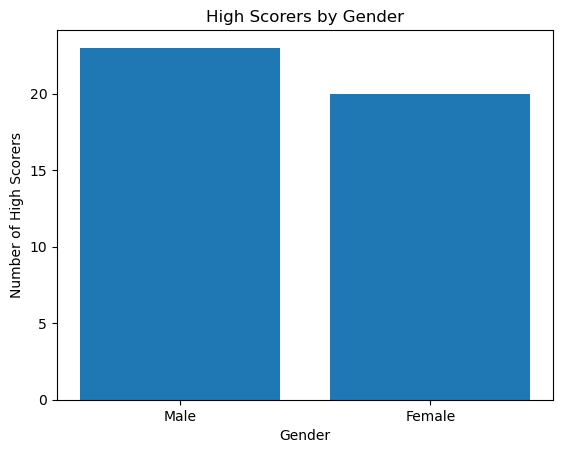

Male high scorers:  23
Female high scorers:  20


In [260]:

# Filter students with scores above 80
high_scorers = ndata[ndata['Exam_Score'] > 80]

# Count Male and Female high scorers
male_high_scorers = high_scorers[high_scorers['Gender'] == 'Male']
female_high_scorers = high_scorers[high_scorers['Gender'] == 'Female']

num_male_high_scorers = len(male_high_scorers)
num_female_high_scorers = len(female_high_scorers)

# Plotting the graph
genders = ['Male', 'Female']
counts = [num_male_high_scorers, num_female_high_scorers]

plt.bar(genders, counts)
plt.xlabel('Gender')
plt.ylabel('Number of High Scorers')
plt.title('High Scorers by Gender')
plt.show()
print("Male high scorers: ", num_male_high_scorers)
print("Female high scorers: ", num_female_high_scorers)


---

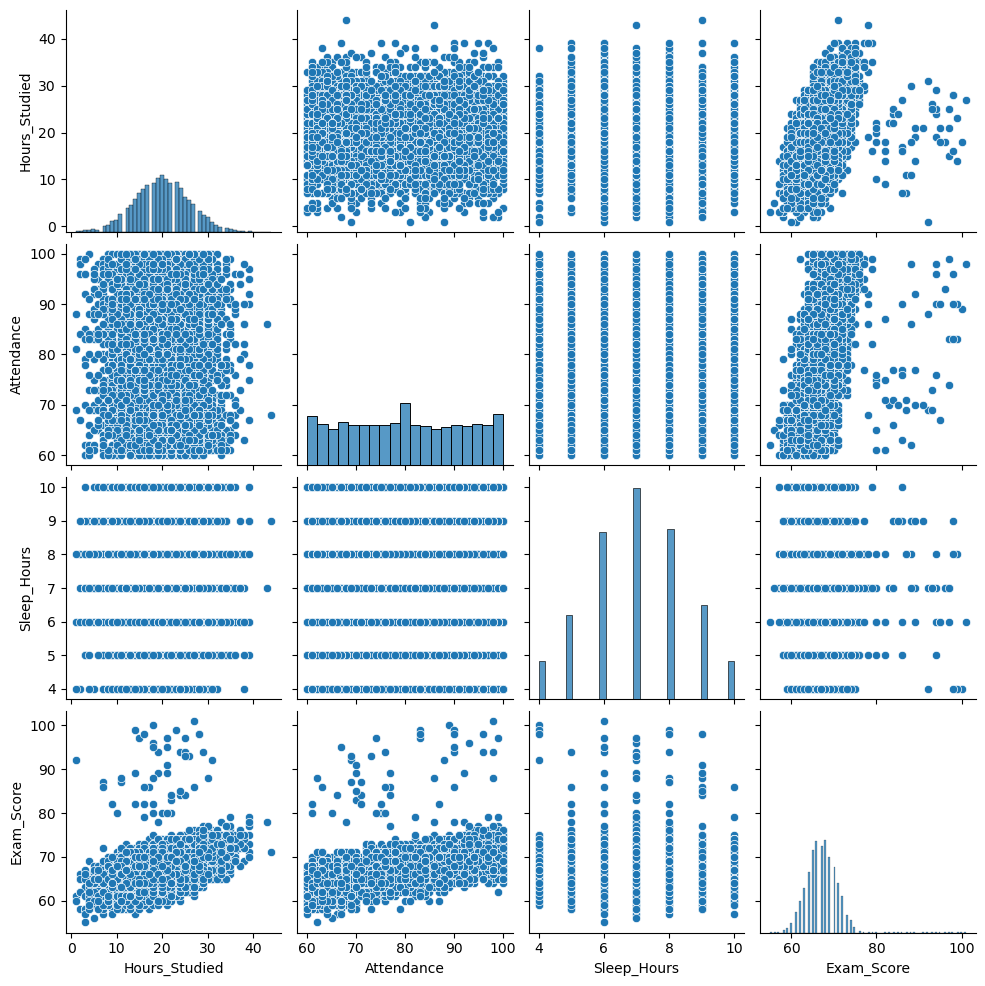

In [262]:
selected_vars = ['Hours_Studied', 'Attendance', 'Sleep_Hours','Exam_Score']

sns.pairplot(ndata[selected_vars])
plt.show()

### Exam scores generally increase with more hours studied, although there are some exceptions where students who study less may still perform well.
### Attendance also shows a positive correlation with exam scores, but this trend is not universal, as some students with lower attendance may still achieve high scores.
### Exam scores appear to be unaffected by sleep hours up to a point, but sleeping more than 8 hours tends to have a negative impact on performance.

---

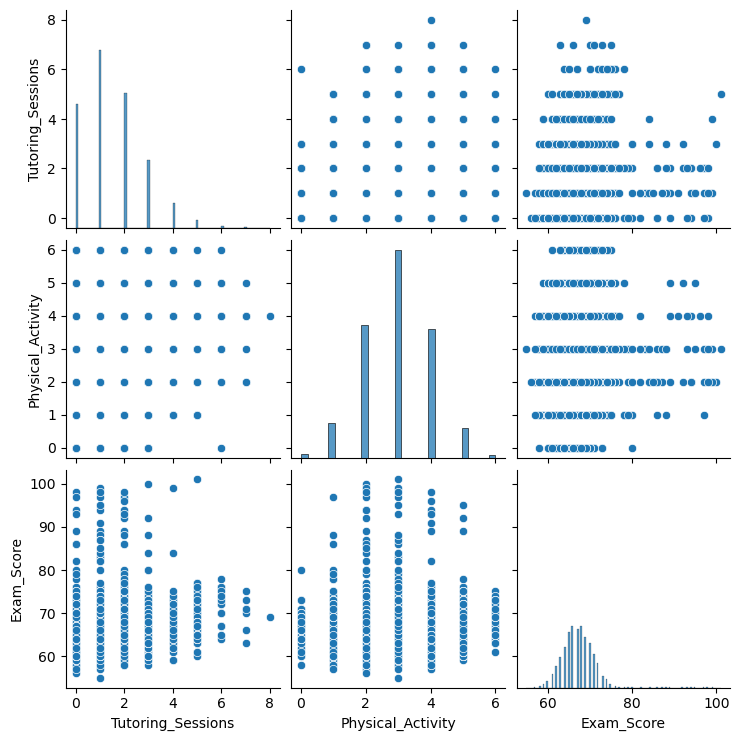

In [265]:
selected_vars = ['Tutoring_Sessions', 'Physical_Activity', 'Learning_Disabilities','Exam_Score']
sns.pairplot(ndata[selected_vars])
plt.show()

### 1 to 2 hours of tutoring has a positive impact on exam scores, but beyond that, additional tutoring seems to be counterproductive and negatively affects performance.
### 2 to 3 hours of physical activity leads to the highest exam scores, suggesting an optimal balance between exercise and academic success.

---

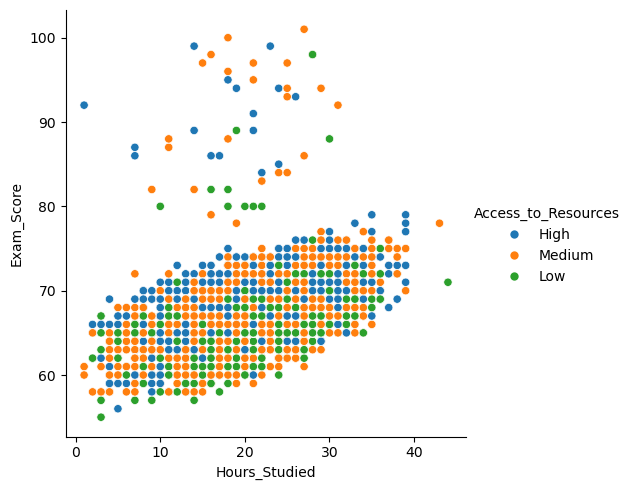

In [268]:
sns.relplot(x = 'Hours_Studied', y = 'Exam_Score' , hue = 'Access_to_Resources', data = ndata)

### High parental involvement positively influences exam scores, indicating that students tend to perform better academically when their parents are more engaged in their education.

---

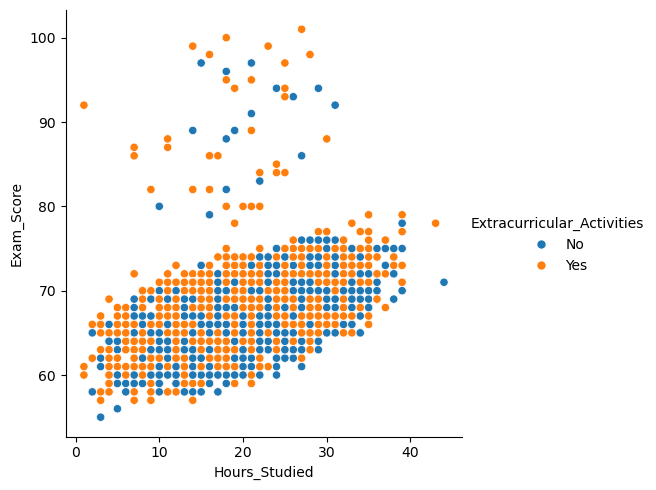

In [273]:
sns.relplot(x = 'Hours_Studied', y = 'Exam_Score' , hue = 'Extracurricular_Activities', data = ndata)

### Participation in extracurricular activities slightly improves exam scores, suggesting a modest positive effect on academic performance.

---

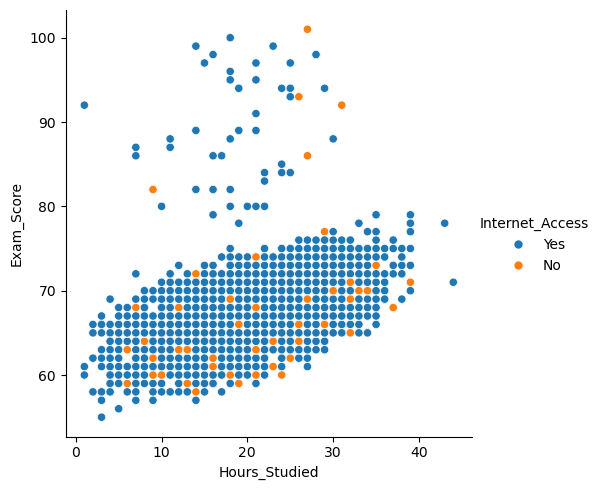

In [276]:
sns.relplot(x = 'Hours_Studied', y = 'Exam_Score' , hue = 'Internet_Access', data = ndata)

### Most students have internetMost low-scoring students have low family incomes, while there isn't much difference in scores between medium and high family income levels. access and tend to perform better than those without it

---

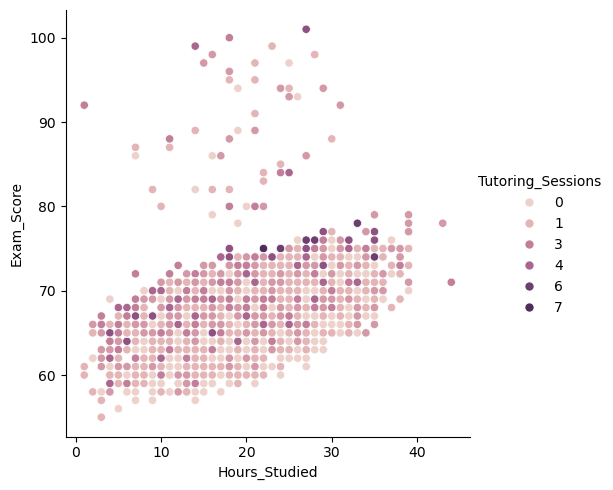

In [279]:
sns.relplot(x = 'Hours_Studied', y = 'Exam_Score' , hue = 'Tutoring_Sessions', data = ndata)

### While tutoring can enhance scores, most high scorers receive fewer than three hours of tutoring. In fact, even the most studious students do not surpass 80 marks. This indicates that tutoring is only beneficial to a degree.

---

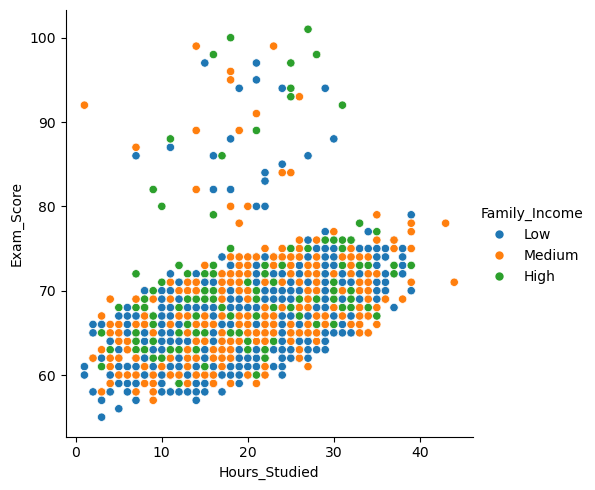

In [282]:
sns.relplot(x = 'Hours_Studied', y = 'Exam_Score' , hue = 'Family_Income', data = ndata)

### Most low-scoring students have low family incomes, while there isn't much difference in scores between medium and high family income levels.

---

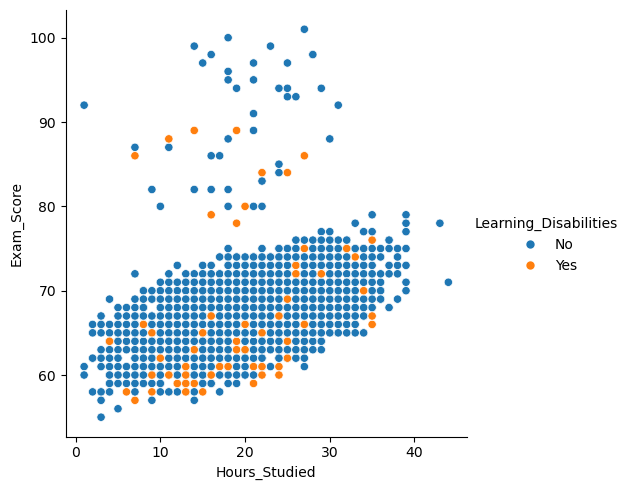

In [285]:
sns.relplot(x = 'Hours_Studied', y = 'Exam_Score' , hue = 'Learning_Disabilities', data = ndata)

### Students with learning disabilities tend to score lower than their peers even with same study hrs
---

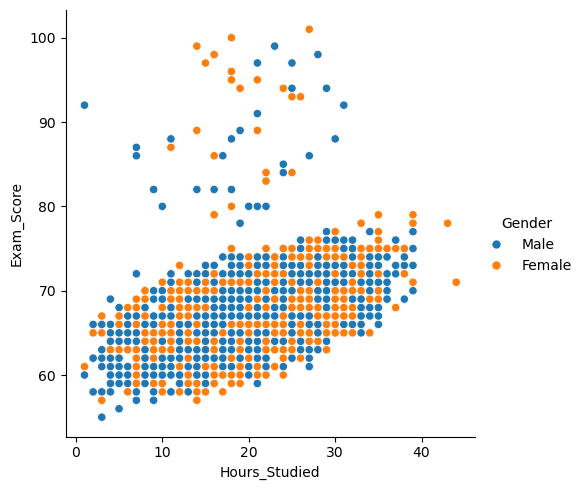

In [287]:
sns.relplot(x = 'Hours_Studied', y = 'Exam_Score' , hue = 'Gender', data = ndata)

### Lastly, gender doesnt play any role in exam scores

---

# Summary
Some key takeaways from the data:

1. **Unexpected High Performers**: Some students with minimal study hours or low attendance manage to achieve high exam scores, suggesting that factors other than study time significantly influence success.

2. **Sleep Patterns**: While most students benefit from adequate sleep, there’s a quirky twist: sleeping over 8 hours might actually hinder exam performance for some.

3. **Tuning the Tutoring**: It turns out that a little tutoring goes a long way—1 to 2 hours can boost scores, but too much tutoring can be a recipe for diminishing returns!

4. **Exercise Boost**: Students who engage in 2 to 3 hours of physical activity seem to strike the perfect balance, enhancing their academic performance while staying active.

5. **Parental Superheroes**: High parental involvement correlates with better scores, highlighting the impact of support systems at home.

6. **Digital Advantage**: Students with internet access tend to perform better, emphasizing the role of technology in modern education.

7. **Income Insights**: Low-income students often struggle academically, while medium and high-income students perform similarly, shedding light on socio-economic factors in education.

8. **Gender Neutrality**: Interestingly, gender doesn’t play a significant role in exam scores, suggesting that academic potential is equal d**emic performa**nce!
Implications: These findings can guide educators in developing targeted interventions to enhance student performance, such as encouraging balanced study habits, promoting parental engagement, and fostering physical activity. For students and parents, understanding these relationships can inform strategies to optimize a**cade**mic suc**ce**ss.

Conclusion: Overall, while various factors influence exam performance, the interplay between study habits, attendance, and support systems underscores the need for a holistic approach to education. Further research could explore the long-term effects of these variables on academic achievement and investigate potential interventions for students facing challenges.